# Notes:

## Accuracy on training and test set(by 0.6 ) improved after removing  "Fare" All Features 
### Most probably first it does not give any extra info as it indicates what may be indicated in class feature, second because i did not use normalization so it is range is very different from the other data 

#### Adding is lonely feature did not add any value.. cus it has same info in parch and SibSp
### adding Standardized Age doesnot improve trainign acc of logistic regression model
### Adding Standardized made log_model worse 

In [6]:
import pandas as pd
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import graphviz  # to visualse the decesion tree
from yellowbrick.contrib.classifier import DecisionViz
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from keras import  models
from keras.layers import Dense
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [ ]:
!pip install xgboost

In [157]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
train_data.head()
# SibSp is the number of Siblings/Spouses on board
# Parch is the number of parents/children on board
# Pclass is the 1=1st , 2nd=2 and 3rd=3

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Data Visulaization through pandas profiling and autoviz

In [192]:
report = pandas_profiling.ProfileReport(train_data)
display(report)

Shape of your Data Set: (891, 12)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Time to run AutoViz (in seconds) = 3.614


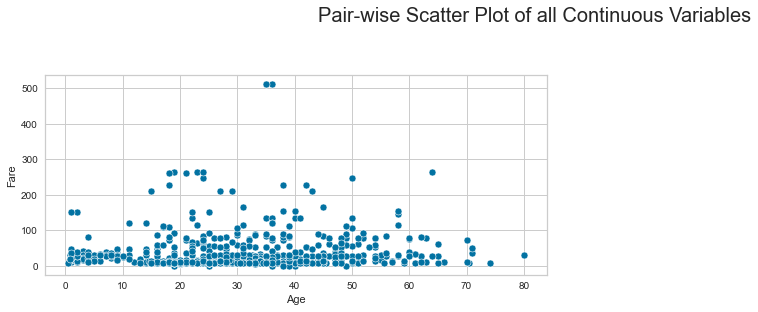

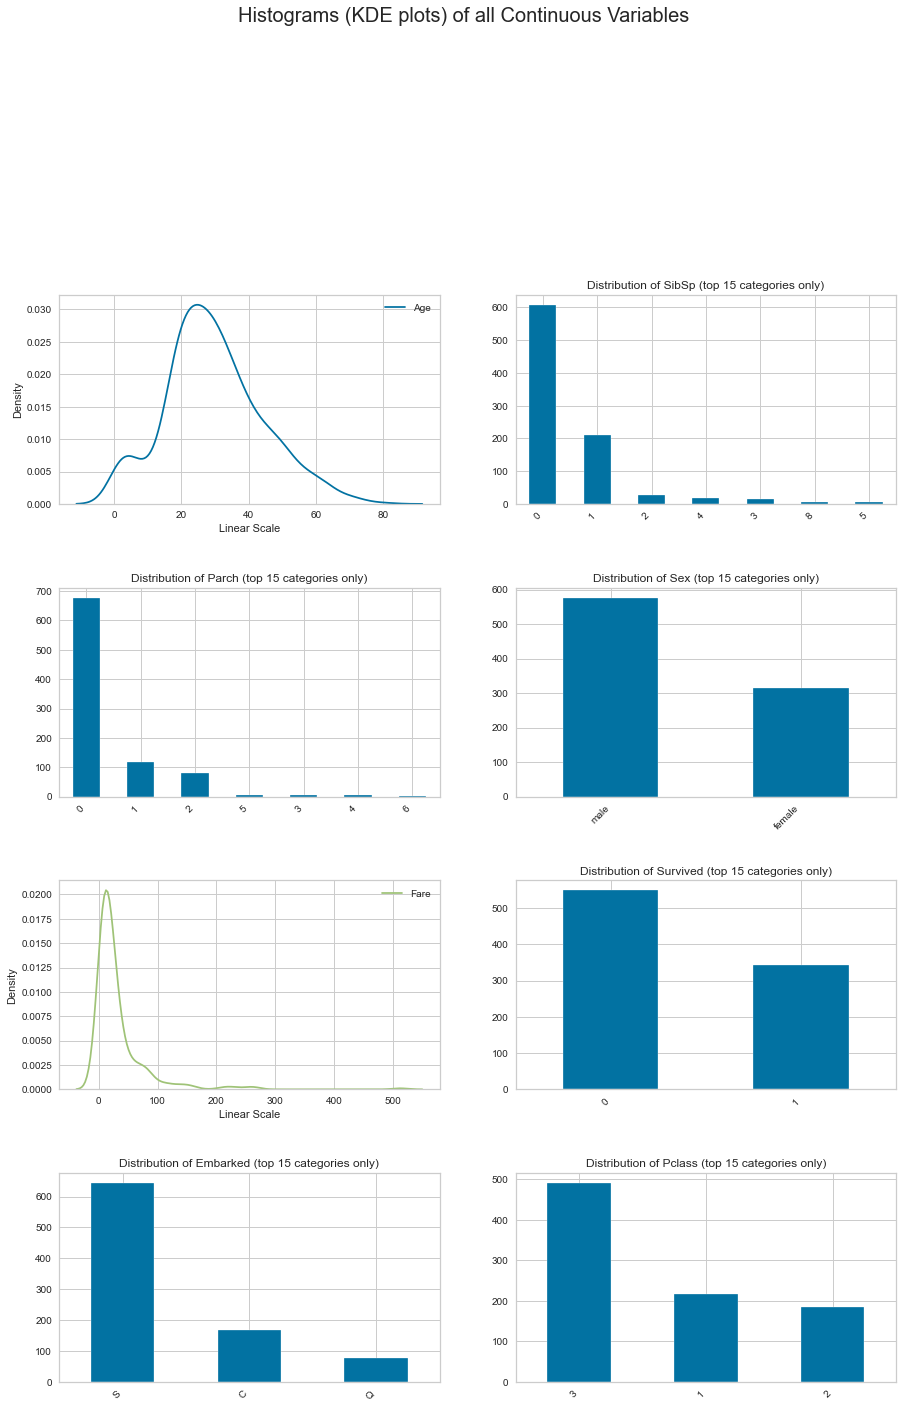

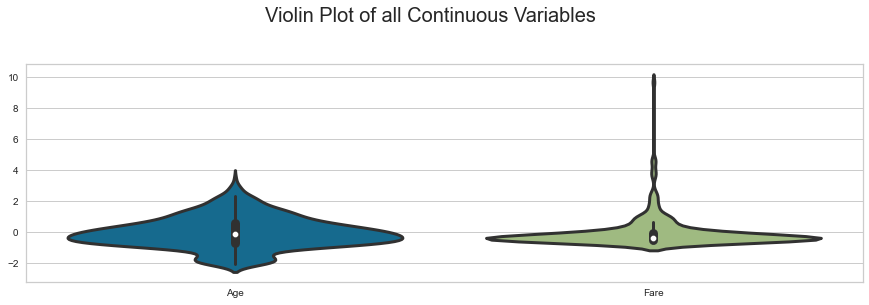

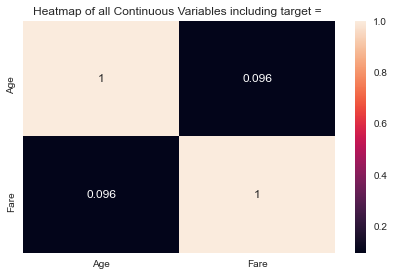

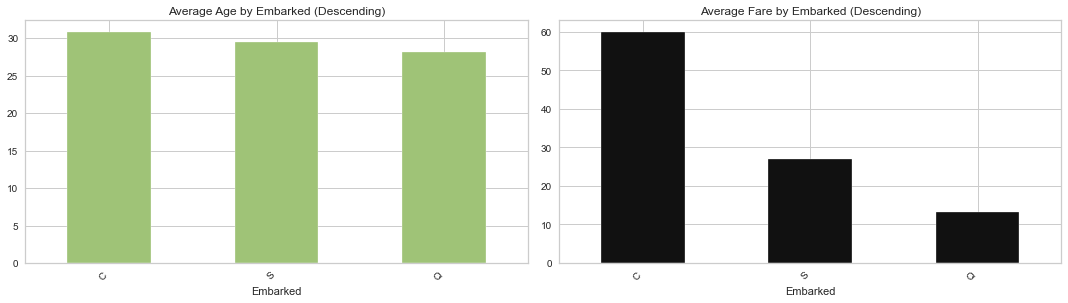

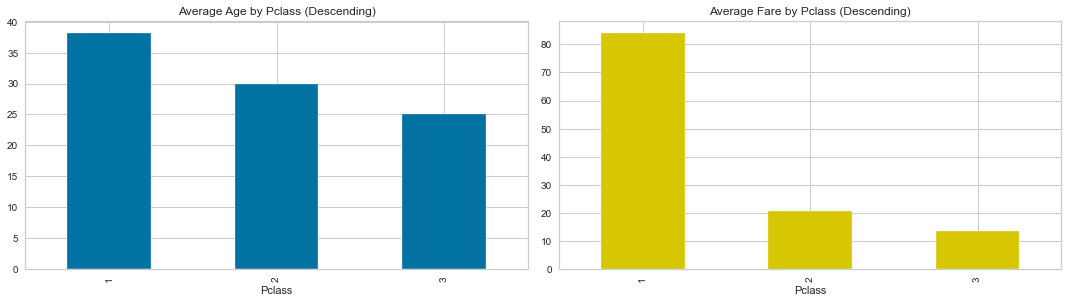

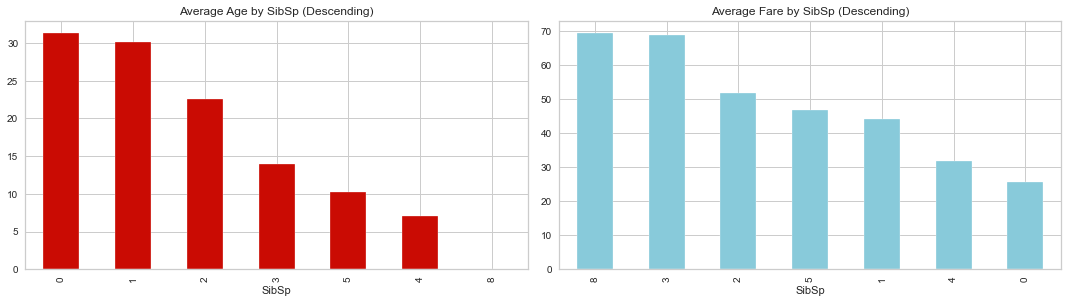

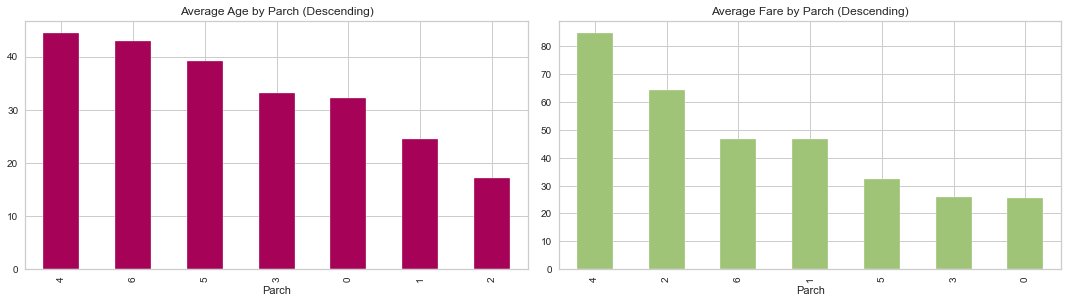

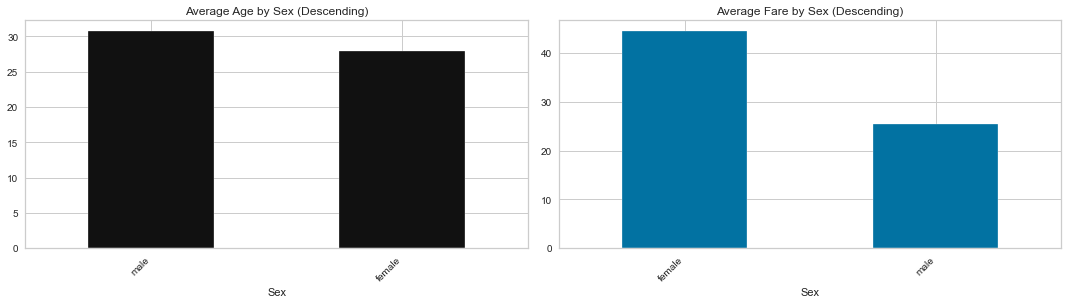

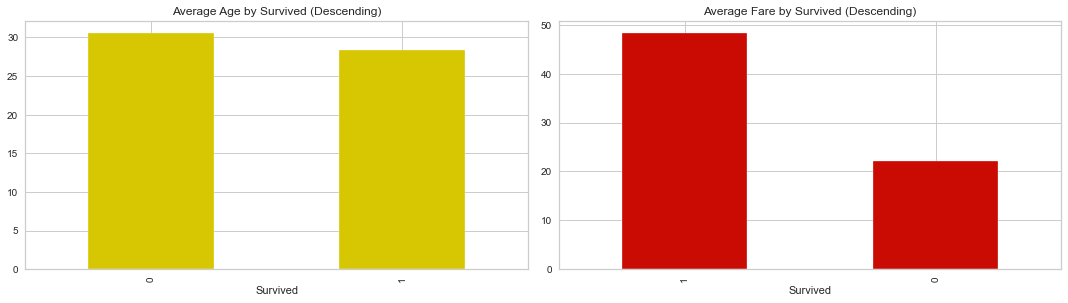

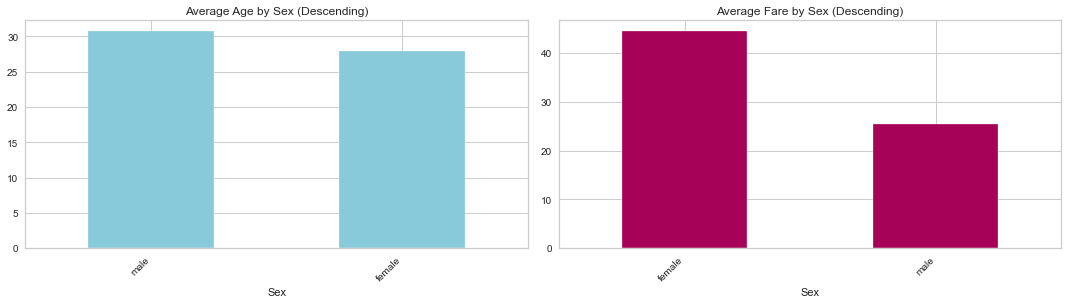

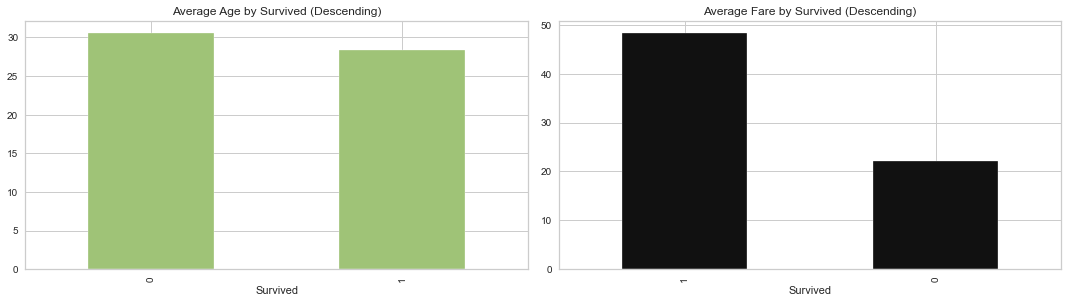

In [193]:
AV = AutoViz_Class()

# Let's now visualize the plots generated by AutoViz.
report_2 = AV.AutoViz("train.csv")

# Data Preparation

In [8]:
y=np.array(train_data.Survived).reshape(-1,1)
x=train_data

# set female=1 and male=1
x["Sex"]=x["Sex"].apply(lambda o: 1 if o=="female" else 0)
test_data["Sex"]=test_data["Sex"].apply(lambda o: 1 if o=="female" else 0) 

age_mean=x["Age"].mean()
x["Age"].fillna(age_mean,inplace=True)
test_data["Age"].fillna(age_mean,inplace=True)

x["Fare"].fillna(x["Fare"].mean(),inplace=True)
test_data["Fare"].fillna(test_data["Fare"].mean(),inplace=True)

x_gender=np.array(x["Sex"]).reshape(-1,1)
x_age=np.array(x["Age"]).reshape(-1,1)
x_class=np.array(x["Pclass"]).reshape(-1,1)

In [ ]:
x.Fare.describe()

In [ ]:
x.loc[x.Fare<100].loc[x.Survived==1].count()

by examing the fare feature , there are 20 passenger fare more than 200 and 14 of them survived  
fare >100 53  and 39 survived 
fare <100 303 survived from total of 838

In [ ]:
303/838

# Three Independent trees with features : Gender, Age and PClass

In [4]:
model_gender=tree.DecisionTreeClassifier(max_depth=5)
model_gender.fit(x_gender,y)
model_gender_score= model_gender.score(x_gender,y)

model_age=tree.DecisionTreeClassifier(max_depth=5)
model_age.fit(x_age,y)
#tree.plot_tree(model_gender)
model_age_score= model_gender.score(x_age,y)


model_class=tree.DecisionTreeClassifier(max_depth=5)
model_class.fit(x_class,y)
model_class_score= model_class.score(x_class,y)

print("Training Error for gender only model is",model_gender_score,"Training Error for Age only model is",model_age_score,"Training Error for PClass only model is",model_class_score)


Training Error for gender only model is 0.7867564534231201 Training Error for Age only model is 0.38271604938271603 Training Error for PClass only model is 0.6790123456790124


# Some Visuaization!

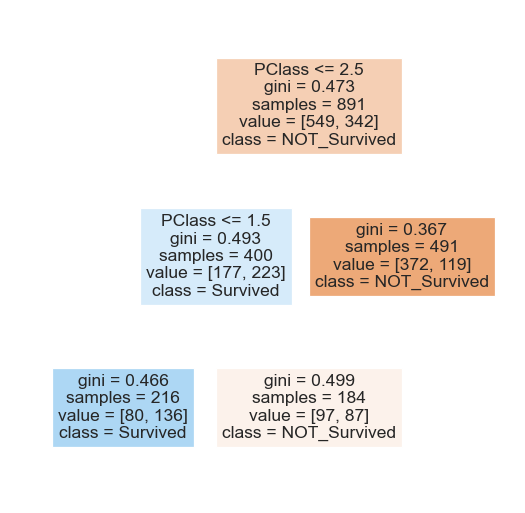

In [5]:
#This Tree shows that most of the survisors from the first class
fn=['PClass']
cn=['NOT_Survived',"Survived"]  #sorted ascending numerically so notsurvived=0 first 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model_class,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

# Two Feature Model (Age,Class)

In [6]:
f_age_class=["Pclass","Age"]
model2=tree.DecisionTreeClassifier(max_depth=10)
model2.fit(x[f_age_class],y)
model2_score= model2.score(x[f_age_class],y)
print("Training Error for the two-Features model is",model2_score, "  Ok..that is  Slightly better!!")

Training Error for the two-Features model is 0.7665544332210998   Ok..that is  Slightly better!!


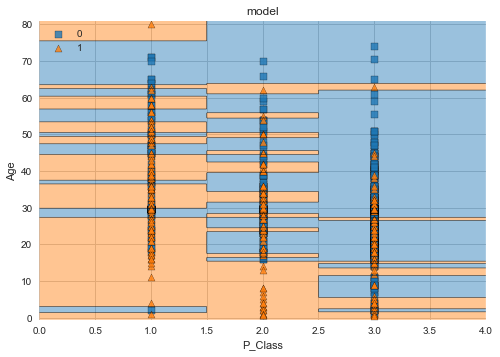

In [7]:
# This plot shows the  decision boundary for the social class and age  for tree of depth=10
X_=x[f_age_class].to_numpy()
plot_decision_regions(X_,y.flatten(), clf=model2, legend=2)

# Adding axes annotations
plt.xlabel('P_Class')
plt.ylabel('Age')
plt.title('model')
plt.show()

# Features : Class, Sex,Parch,Fare,Embarked,SibSp
## Decision Tree Model 
## Using Grid search and cross validation to choose the optimum max_depth

Edit1: removed Fare


In [9]:
x["Is_lonely"]=1
x["Is_lonely"].loc[x["Parch"] + x["SibSp"]>0 ]=0
age_mean= x.Age.mean()

x.Age=x["Age"].fillna(age_mean) 

age_std=x.Age.std()
fare_mean=x.Fare.mean()
fare_std=x.Fare.std()
x.Age=x["Age"].apply(lambda z: (z-age_mean)/age_std)
x.Fare=x.Fare.apply(lambda z: (z-fare_mean)/fare_std)


In [59]:
test_data.Age=test_data["Age"].apply(lambda z: (z-age_mean)/age_std)
test_data.Fare=test_data.Fare.apply(lambda z: (z-fare_mean)/fare_std)

In [53]:


All_Features=["Pclass","Sex","SibSp","Parch","Embarked","Age","Fare"]
parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_desicion_tree = tree.DecisionTreeClassifier(
    random_state=1,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=30,
    scoring='accuracy',
)
model_desicion_tree.fit(pd.get_dummies(x[All_Features]),y)
print("chosen param is ",model_desicion_tree.best_params_,"score when applying chosen params",model_desicion_tree.best_score_)


chosen param is  {'max_depth': 11} score when applying chosen params 0.8016091954022989


In [38]:
x

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex           Age  \
0                              Braund, Mr. Owen Harris    0 -5.921480e-01   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  6.384304e-01   
2                               Heikkinen, Miss. Laina    0 -2.845034e-01   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  4.076970e-01   
4                             Allen, Mr. William Henry    0  4.076970e-01   
..                                                 ...  ...           ...   
886                              Montvila, Rev. Juozas    0 -2.075923e-01   
887                       Graham, Miss. Margaret Edith    0 -8.228815e-01   
888           Johnston, Miss. Catherine Helen "Carrie"    0 -1.993666e-16   
889                              Behr, Mr. Karl Howell    0 -2.845034e-01   
890                                Dooley, Mr. Patrick    0  1.769635e-01   

     SibSp  Parch            Ticket      Fare Cabin Embarked  Is_lonely  
0        1      0         A/5 21171 -0.502163   NaN        S          0  
1        1      0          PC 17599  0.786404   C85        C          0  
2        0      0  STON/O2. 3101282 -0.488580   NaN        S          1  
3        1      0            113803  0.420494  C123        S          0  
4        0      0            373450 -0.486064   NaN        S          1  
..     ...    ...               ...       ...   ...      ...        ...  
886      0      0            211536 -0.386454   NaN        S          1  
887      0      0            112053 -0.044356   B42        S          1  
888      1      2        W./C. 6607 -0.176164   NaN        S          0  
889      0      0            111369 -0.044356  C148        C          1  
890      0      0            370376 -0.492101   NaN        Q          1  

[891 rows x 13 columns]

In [10]:

y_pred=model_desicion_tree.predict(pd.get_dummies(test_data[All_Features]))
sub_df=pd.DataFrame(test_data["PassengerId"],columns=["PassengerId"])
sub_df["Survived"]=y_pred
sub_df.to_csv("sub.csv",index=False)

KeyError: "['Is_lonely'] not in index"

# Random Forest Classifer , Score on test_data=0.64354

In [ ]:
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}
rf_model=GridSearchCV(RandomForestClassifier( random_state=0),parameters,cv=30,scoring='accuracy')
rf_model.fit(pd.get_dummies(x[All_Features]),np.ravel(y))
#rf_model_score= rf_model.score(pd.get_dummies(x[All_Features]),y)
print("chosen params are ",rf_model.best_params_,"score when applying chosen params",rf_model.best_score_)


In [ ]:
y1_pred=rf_model.predict(pd.get_dummies(test_data[All_Features]))
sub1_df=pd.DataFrame(test_data["PassengerId"],columns=["PassengerId"])
sub1_df["Survived"]=y1_pred
sub1_df.to_csv("sub_random_forests.csv",index=False)

## NN

In [ ]:
model_NN = models.Sequential()
model_NN.add(Dense(60, activation='relu'))
model_NN.add(Dense(40, activation='relu'))
model_NN.add(Dense(20, activation='relu'))
model_NN.add(Dense(10, activation='relu'))
model_NN.add(Dense(1, activation='sigmoid'))
model_NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model_NN.fit(pd.get_dummies(x[All_Features]),y,epochs=150, batch_size=10) 


In [ ]:
model_NN

In [ ]:
plt.plot(history.history["accuracy"])
plt.xlabel("number of Iterations")
plt.ylabel("accuracy")
plt.title("accuracy vs iterations ")

# SVM Model --> SVC

In [ ]:
model_SVC=SVC(C= 1000, degree= 3, gamma= 0.001, kernel= 'rbf')
model_SVC.fit(pd.get_dummies(x[All_Features]), y)
model_SVC.score(pd.get_dummies(x[All_Features]),y)

# Logistic Regression Model

In [42]:


preprocessor=preprocessing.PolynomialFeatures(degree=1)
fs_poly=preprocessor.fit_transform(pd.get_dummies(x[All_Features]))
log_model = LogisticRegression(random_state=0,class_weight={0:1 ,1:1} ).fit(fs_poly, y)
print("Training acc of logistic regression model with degree2",log_model.score(fs_poly, y))

Training acc of logistic regression model with degree2 0.7317620650953984


In [43]:
log_model.coef_

array([[-1.18225388e-03, -9.17311388e-01,  0.00000000e+00,
        -5.59278130e-01, -1.80929308e-02, -1.18546714e+00,
        -5.02879136e-01,  1.54681930e-01, -3.35745714e-01,
         2.22705682e-01, -7.08611672e-01]])

In [40]:
x[All_Features]

Pclass  Sex  SibSp  Parch Embarked  Is_lonely           Age      Fare
0         3    0      1      0        S          0 -5.921480e-01 -0.502163
1         1    0      1      0        C          0  6.384304e-01  0.786404
2         3    0      0      0        S          1 -2.845034e-01 -0.488580
3         1    0      1      0        S          0  4.076970e-01  0.420494
4         3    0      0      0        S          1  4.076970e-01 -0.486064
..      ...  ...    ...    ...      ...        ...           ...       ...
886       2    0      0      0        S          1 -2.075923e-01 -0.386454
887       1    0      0      0        S          1 -8.228815e-01 -0.044356
888       3    0      1      2        S          0 -1.993666e-16 -0.176164
889       1    0      0      0        C          1 -2.845034e-01 -0.044356
890       3    0      0      0        Q          1  1.769635e-01 -0.492101

[891 rows x 8 columns]

# Mean the prediction of all four models:
##    that got me the highest test score till now of 0.71531
after remove Fare from features , it improved to 0.77


In [ ]:
def get_mean_pred(x_data):
#nn_pred=model_NN.predict(test_data[All_Features])
    rf_test_pred = rf_model.predict(x_data)
    model_SVC_pred1 = model_SVC.predict(x_data)
    tree_pred = model_desicion_tree.predict(x_data)
    log_model_pred = log_model.predict(preprocessor.transform(x_data))

    test_pred_all_models=pd.DataFrame({"rf_test_pred":rf_test_pred,"model_SVC_pred1":model_SVC_pred1,"tree_pred":tree_pred,"log_model_pred":log_model_pred})
    return  np.round((rf_test_pred + model_SVC_pred1 + tree_pred + log_model_pred ) / 4)

In [ ]:
mean_training_pred=get_mean_pred(pd.get_dummies(x[All_Features]))

In [ ]:
dummy.loc[ dummy.Survived==1].count()

In [ ]:
x.loc[x.Survived==1].count()

In [ ]:
x.loc[x.Age>29].loc[x.Survived==0]

age<29 217 not survived, 148 survived, age>29 186 survived, 321 not suvrvied

In [ ]:
48/549
118/342

In [ ]:
118/166

 ##  70 % misclassified data is from the Survivor class!!!! 
 Tried to retrain the logistic regression model with higher class wight to  survivors

In [ ]:
## visulaizing data that i have got wrong
df=pd.DataFrame({"mean_training_pred": mean_training_pred, "True_value":x["Survived"]})
dummy=x.loc[df["mean_training_pred"]!=df["True_value"]]
dum1 = pandas_profiling.ProfileReport(dummy)
display(dum1)

In [ ]:
From the previous 

In [ ]:
x_test=pd.get_dummies(test_data[All_Features])
mean_test_pred=get_mean_pred(x_test)
submission_mean_pred=pd.DataFrame({"PassengerId":test_data["PassengerId"],"Survived":mean_test_pred.astype(int)})
submission_mean_pred.to_csv("mean_prediction_sub.csv",index=False)
pd.read_csv("mean_prediction_sub.csv")
#submission_mean_pred["Survived"].sum()

In [ ]:
submission_mean_pred["Survived"]

# Ensemble Classifiers

In [ ]:
rf_train_pred = rf_model.predict(pd.get_dummies(x[All_Features]))
SVC_train_pred = model_SVC.predict(pd.get_dummies(x[All_Features]))
tree_pred_train = model_desicion_tree.predict(pd.get_dummies(x[All_Features]))
log_train_pred = log_model.predict(preprocessor.transform(pd.get_dummies(x[All_Features])))

train_pred=pd.DataFrame({"rf_train_pred":rf_train_pred,"SVC_train_pred":SVC_train_pred,"tree_pred_train":tree_pred_train,"log_train_pred":log_train_pred})

mean_train_pred = np.round((rf_train_pred + SVC_train_pred + tree_pred_train + log_train_pred ) / 4)

parameters={"C":[0.1 ,1, 10 ,100, 1000 ],"degree":[3,4,5],"gamma":[1, 0.1, 0.001, 0.0001, 'auto'],"kernel":['linear', 'poly', 'rbf']} 
#model_SVC_pred=GridSearchCV(cv=5,param_grid=parameters,estimator=SVC())
model_SVC_pred=SVC(C= 1, degree= 3, gamma=1, kernel= 'linear')
model_SVC_pred.fit(train_pred, y)
#model_SVC_pred.score(train_pred,y)

In [ ]:
model_SVC_pred.coef_

### From the coeffs of the ensemble above we can say that logistic regression model has the largest effect

In [ ]:
model_SVC_pred.best_score_

In [ ]:
model_SVC_pred.best_params_

In [ ]:
f_pred=model_SVC_pred.predict(test_pred_all_models)
subfile=pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived":f_pred})
subfile.to_csv("subfile",index=False)

### Trying more.. logitic regression model with degree=2

In [ ]:
preprocessor=preprocessing.PolynomialFeatures(degree=2)
fs_poly=preprocessor.fit_transform(pd.get_dummies(x[All_Features]))
clf = LogisticRegression(random_state=0,solver="liblinear").fit(fs_poly, y)
print("Training acc of logistic regression model with degree2",clf.score(fs_poly, y))

In [ ]:
age_scaled=preprocessing.scale(x["Age"])
age_scaled.std()

In [140]:
## overfitttttt 
import lightgbm as lgb
from sklearn.model_selection import train_test_split


X_tr, X_val, y_tr, y_val = train_test_split(pd.get_dummies(x[All_Features]), list(x.Survived), test_size=0.2, random_state=42)
#dtrain = lgb.Dataset(train[feature_cols], label=train['outcome'])
#dvalid = lgb.Dataset(valid[feature_cols], label=valid['outcome'])

param = {'num_leaves': 8, 'objective': 'binary','lambda_l2':10 }
param['metric'] = 'auc'
num_round = 1000
bst = lgb.train(param,lgb.Dataset( X_tr,label=y_tr), num_round, valid_sets=lgb.Dataset(X_val,label=y_val), early_stopping_rounds=10)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[1]	valid_0's auc: 0.856049
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.856049
[3]	valid_0's auc: 0.856049
[4]	valid_0's auc: 0.864543
[5]	valid_0's auc: 0.864543
[6]	valid_0's auc: 0.865573
[7]	valid_0's auc: 0.865315
[8]	valid_0's auc: 0.871493
[9]	valid_0's auc: 0.87278
[10]	valid_0's auc: 0.87278
[11]	valid_0's auc: 0.871236
[12]	valid_0's auc: 0.870463
[13]	valid_0's auc: 0.870013
[14]	valid_0's auc: 

In [144]:
from sklearn import metrics

ypred = bst.predict(pd.get_dummies(x[All_Features]))
#roc_auc_score(test['outcome'], ypred)
for i in range(len(ypred)):
    if ypred[i]>=0.5:
        ypred[i]=1
    else:
        ypred[i]=0
score = metrics.roc_auc_score(x.Survived,ypred)
score
# Adding fearture of Age and Fare to this model increase alooot the acc

0.8186415492282619

In [142]:
ypred_test = bst.predict(pd.get_dummies(test_data[All_Features]))
for i in range(len(ypred_test)):
    if ypred_test[i]>=0.5:
        ypred_test[i]=1
    else:
        ypred_test[i]=0

In [143]:
df_lgb=pd.DataFrame({"PassengerId":test_data.PassengerId,"Survived":ypred_test},dtype=np.int64)
df_lgb
df_lgb.to_csv("sub_lgb_model.csv",index=False)

In [89]:
df_lgb

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         1
4            896         0
..           ...       ...
413         1305         1
414         1306         1
415         1307         1
416         1308         1
417         1309         0

[418 rows x 2 columns]

In [109]:
pd.read_csv("sub_lgb_model.csv")

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [215]:
import category_encoders as ce
count_enc =ce.TargetEncoder(train_data["Embarked"])

# Learn encoding from the training set
f=count_enc.fit_transform(train_data["Embarked"],train_data["Survived"])
f

Embarked
0    0.336957
1    0.553571
2    0.336957
3    0.336957
4    0.336957
..        ...
886  0.336957
887  0.336957
888  0.336957
889  0.553571
890  0.389610

[891 rows x 1 columns]

In [214]:
train_data["SibSp"].head(40)

0     1
1     1
2     0
3     1
4     0
5     0
6     0
7     3
8     0
9     1
10    1
11    0
12    0
13    1
14    0
15    0
16    4
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    3
25    1
26    0
27    3
28    0
29    0
30    0
31    1
32    0
33    0
34    1
35    1
36    0
37    0
38    2
39    1
Name: SibSp, dtype: int64

In [218]:
train_data.loc[train_data["Survived"]==1].Embarked.value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [219]:
train_data.loc[train_data["Survived"]==0].Embarked.value_counts()

S    427
C     75
Q     47
Name: Embarked, dtype: int64

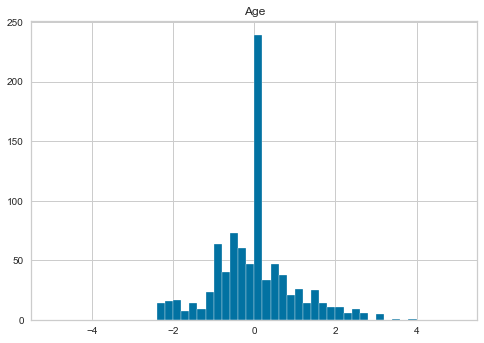

In [225]:
plt.hist(x.Age, range=(-5, 5), bins=50);
plt.title('Age');

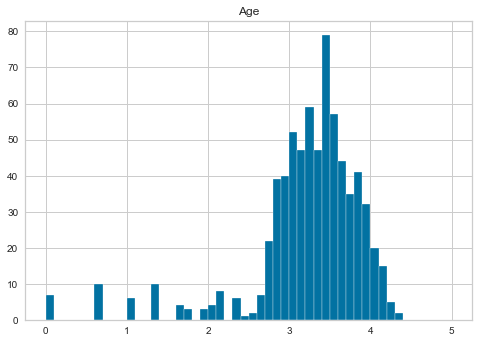

In [231]:
plt.hist(np.log(train_data.Age), range=(0, 5), bins=50);
plt.title('Age');